# Large set

## Load data

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import functions as fc

print("Reading files:")
data        = pd.read_hdf("/ceph/aavocone/Datasets/signal3_large.h5", "df")
charged     = pd.read_hdf("/ceph/aavocone/Datasets/charged_large.h5", "df")
mixed       = pd.read_hdf("/ceph/aavocone/Datasets/mixed_large.h5", "df")
uu          = pd.read_hdf("/ceph/aavocone/Datasets/uu_large.h5", "df")
cc          = pd.read_hdf("/ceph/aavocone/Datasets/cc_large.h5", "df")
dd          = pd.read_hdf("/ceph/aavocone/Datasets/dd_large.h5", "df")
ss          = pd.read_hdf("/ceph/aavocone/Datasets/ss_large.h5", "df")
print("completed!\n")
sets =[data,charged,mixed,uu,cc,dd,ss]
df = pd.concat(sets)

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Reading files:
completed!



## train test val split

In [2]:
from sklearn.model_selection import train_test_split

#test train split
X = df[df.columns[:-3]]    #exclude "signal" "classification"
y = df["signal"]            
xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)


In [3]:
xtrain.columns

Index(['B_sig_K_dr', 'B_sig_K_dz', 'B_sig_CleoConeCS_3_ROE',
       'thrustAxisCosTheta', 'aplanarity', 'sphericity',
       'harmonicMomentThrust0', 'harmonicMomentThrust1',
       'harmonicMomentThrust2', 'harmonicMomentThrust3',
       'harmonicMomentThrust4', 'foxWolframR1', 'foxWolframR2', 'foxWolframR3',
       'foxWolframR4'],
      dtype='object')

## load models and predict_proba

In [4]:
model50 = xgb.XGBClassifier()
model50.load_model("/work/aavocone/models/model50.txt")
y50_train = model50.predict_proba(xtrain)[:,1]
y50 = model50.predict_proba(xtest)[:,1]

model100 = xgb.XGBClassifier()
model100.load_model("/work/aavocone/models/model100.txt")
y100_train = model100.predict_proba(xtrain)[:,1]
y100 = model100.predict_proba(xtest)[:,1]

model200 = xgb.XGBClassifier()
model200.load_model("/work/aavocone/models/model200.txt")
y200_train = model200.predict_proba(xtrain)[:,1]
y200 = model200.predict_proba(xtest)[:,1]

model500 = xgb.XGBClassifier()
model500.load_model("/work/aavocone/models/model500.txt")
y500_train = model500.predict_proba(xtrain)[:,1]
y500 = model500.predict_proba(xtest)[:,1]




## get efficiency

In [5]:
sh50_train,bh50_train,s50_train,b50_train,bin_edges = fc.efficiency(y50_train,ytrain, eff_type = 1)
sh50,bh50,s50,b50,bin_edges = fc.efficiency(y50,ytest, eff_type = 1)

sh100_train,bh100_train,s100_train,b100_train,bin_edges = fc.efficiency(y100_train,ytrain, eff_type = 1)
sh100,bh100,s100,b100,bin_edges = fc.efficiency(y100,ytest, eff_type = 1)

sh200_train,bh200_train,s200_train,b200_train,bin_edges = fc.efficiency(y200_train,ytrain, eff_type = 1)
sh200,bh200,s200,b200,bin_edges = fc.efficiency(y200,ytest, eff_type = 1)

sh500_train,bh500_train,s500_train,b500_train,bin_edges = fc.efficiency(y500_train,ytrain, eff_type = 1)
sh500,bh500,s500,b500,bin_edges = fc.efficiency(y500,ytest, eff_type = 1)



Reconstruction efficiency with n=100.000 calculated.
Reconstruction efficiency with n=100.000 calculated.
Reconstruction efficiency with n=100.000 calculated.
Reconstruction efficiency with n=100.000 calculated.
Reconstruction efficiency with n=100.000 calculated.
Reconstruction efficiency with n=100.000 calculated.
Reconstruction efficiency with n=100.000 calculated.
Reconstruction efficiency with n=100.000 calculated.


In [6]:
print(df.signal.sum())
print(len(df)-df.signal.sum())

20067.0
139016278.0


## 50 overtraining

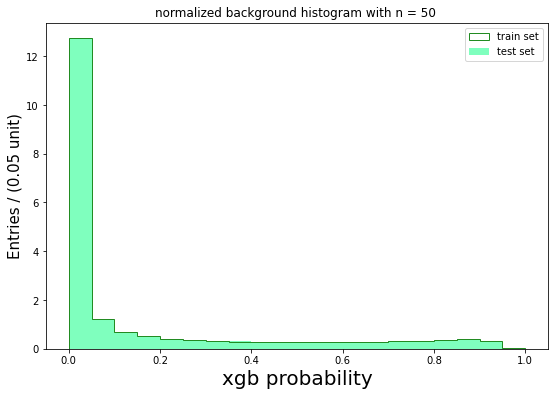

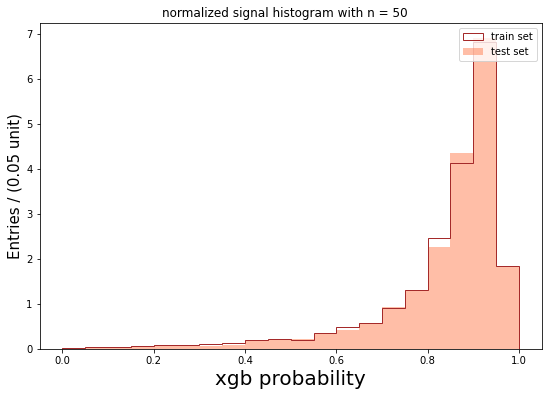

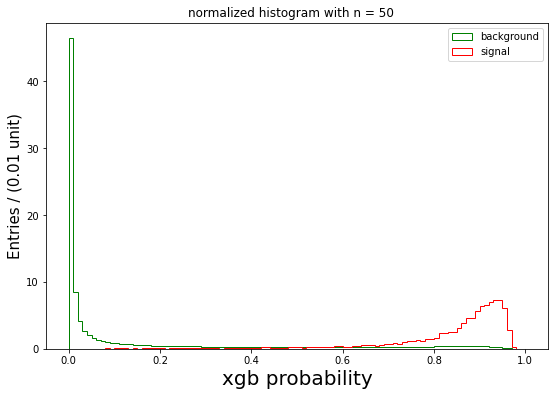

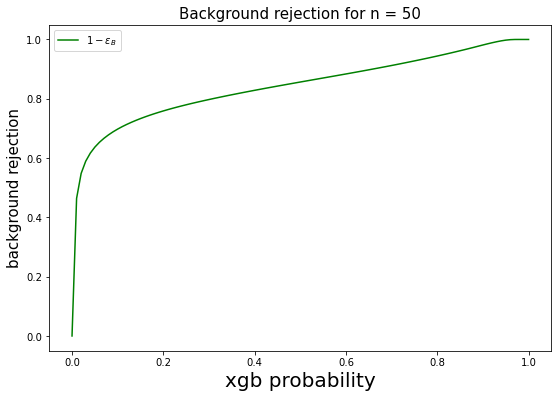

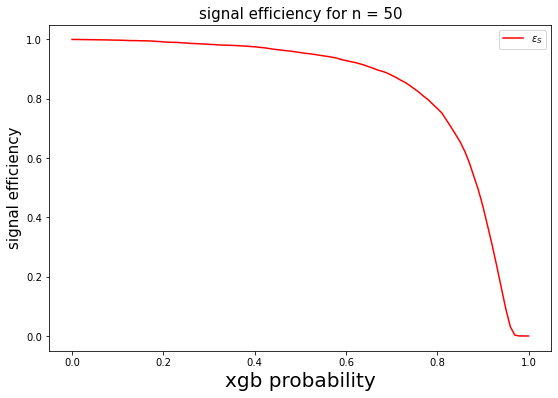

In [ ]:
estimator = 50
binning = np.linspace(0,1,21)
#Test for overtraining
#background
plt.figure(figsize=(9,6))
plt.hist(bh50_train,bins = binning, density=True, histtype="step", label = "train set", color = "forestgreen")
plt.hist(bh50,bins = binning, density=True, histtype="stepfilled", label = "test set", color = "springgreen", alpha = 0.5)
plt.title(f"normalized background histogram with n = {estimator} ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_50_overtrain_background.pdf", format="pdf",bbox_inches="tight")
plt.show() 

#signal
plt.figure(figsize=(9,6))
plt.hist(sh50_train,bins = binning, density=True, histtype="step", label = "train set", color = "brown")
plt.hist(sh50,bins = binning, density=True, histtype="stepfilled", label = "test set", color = "coral", alpha = 0.5)
plt.title(f"normalized signal histogram with n = {estimator}   ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_50_overtrain_signal.pdf", format="pdf",bbox_inches="tight")
plt.show()


#histogram
plt.figure(figsize=(9,6))
plt.hist(bh50,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
plt.hist(sh50,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
plt.title(f"normalized histogram with n = {estimator}   ")
plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/large_50_histogram.pdf", format="pdf",bbox_inches="tight")
plt.show()


#signal efficiency background rejection
estimator = 50
plt.figure(figsize=(9,6))
plt.plot(bin_edges, 1-b50, label = "$1-\epsilon_B$", color ="g")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection for n = {estimator}", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_{estimator}_background_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, s50, label = "$\epsilon_S$", color = "r")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency",fontsize=15)
plt.title(f"signal efficiency for n = {estimator}", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_{estimator}_signal_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()



## n = 100

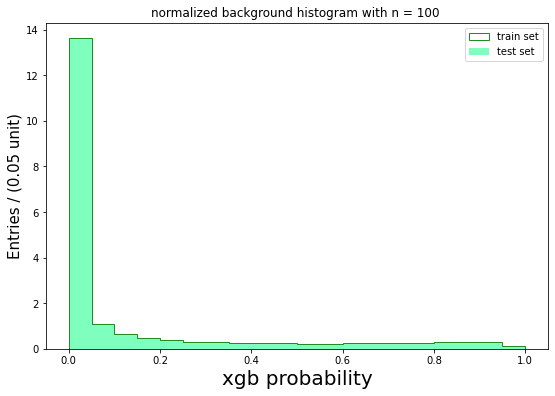

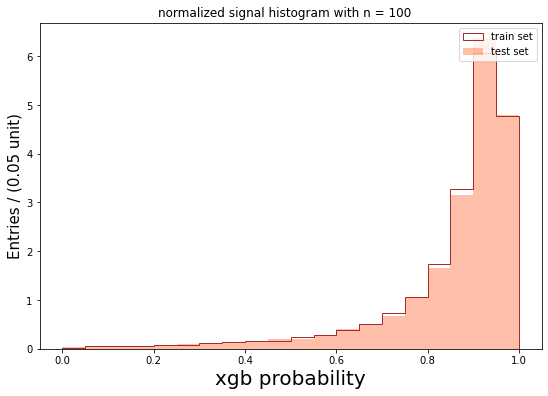

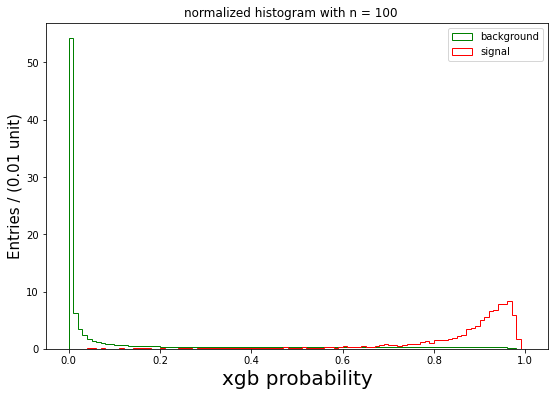

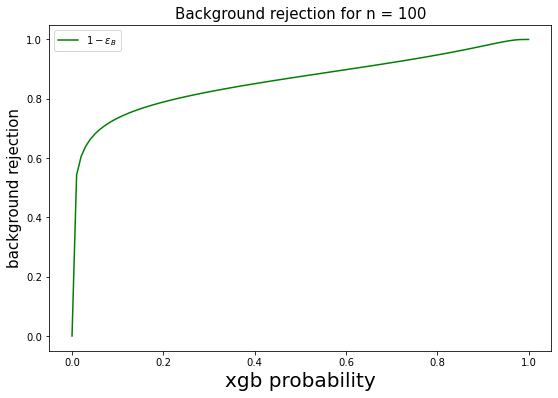

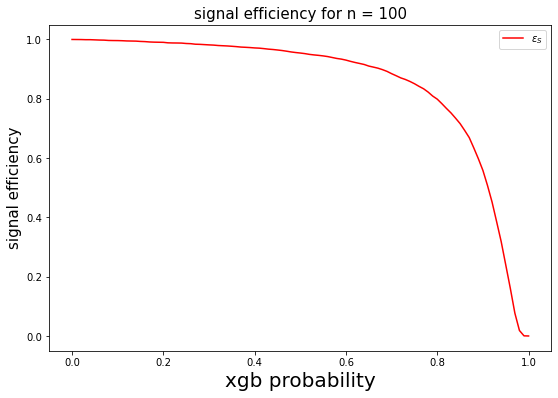

In [ ]:


estimator = 100

#Test for overtraining
#background
plt.figure(figsize=(9,6))
plt.hist(bh100_train,bins = binning, density=True, histtype="step", label = "train set", color = "forestgreen")
plt.hist(bh100,bins = binning, density=True, histtype="stepfilled", label = "test set", color = "springgreen", alpha = 0.5)
plt.title(f"normalized background histogram with n = {estimator} ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_100_overtrain_background.pdf", format="pdf",bbox_inches="tight")
plt.show() 

#signal
plt.figure(figsize=(9,6))
plt.hist(sh100_train,bins = binning, density=True, histtype="step", label = "train set", color = "brown")
plt.hist(sh100,bins = binning, density=True, histtype="stepfilled", label = "test set", color = "coral", alpha = 0.5)
plt.title(f"normalized signal histogram with n = {estimator}   ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_100_overtrain_signal.pdf", format="pdf",bbox_inches="tight")
plt.show()


#histogram
plt.figure(figsize=(9,6))
plt.hist(bh100,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
plt.hist(sh100,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
plt.title(f"normalized histogram with n = {estimator}   ")
plt.ylabel("Entries / ({:.2f} unit)".format(bin_edges[1]-bin_edges[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_100_histogram.pdf", format="pdf",bbox_inches="tight")
plt.show()


#signal efficiency background rejection
plt.figure(figsize=(9,6))
plt.plot(bin_edges, 1-b100, label = "$1-\epsilon_B$", color ="g")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection for n = {estimator}", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_{estimator}_background_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, s100, label = "$\epsilon_S$", color = "r")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency",fontsize=15)
plt.title(f"signal efficiency for n = {estimator}", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_{estimator}_signal_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()


## n=200

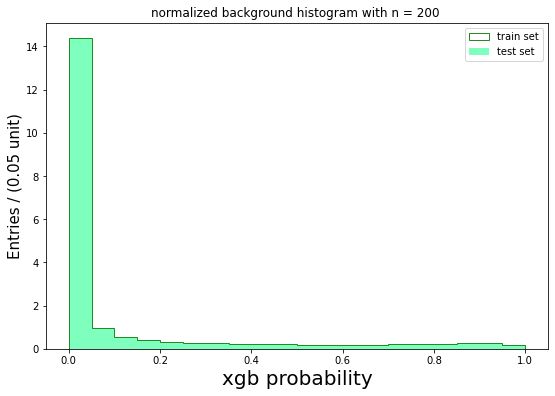

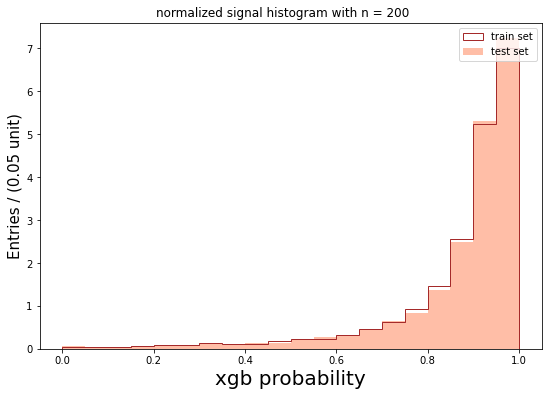

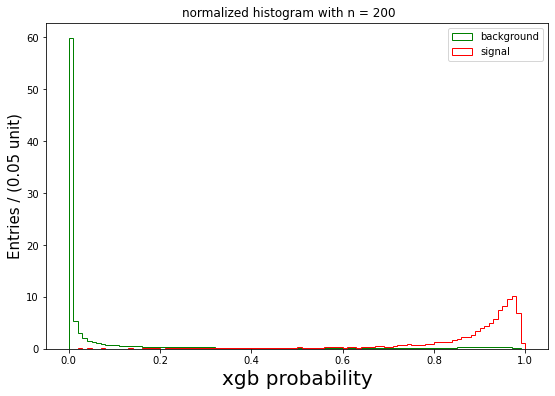

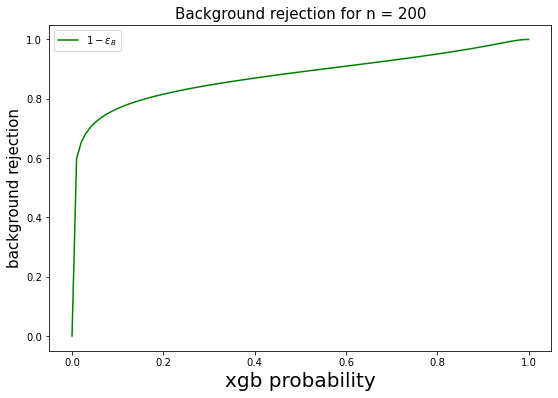

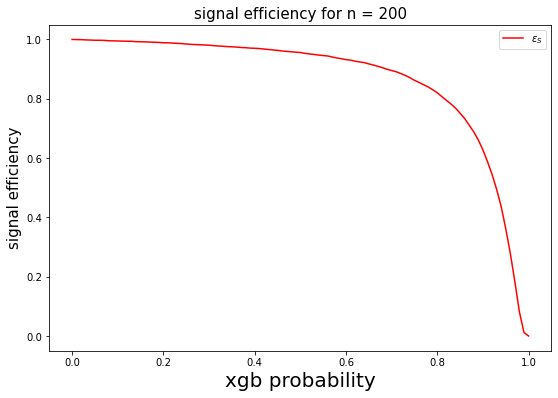

In [ ]:


estimator = 200
#Test for overtraining
#background
plt.figure(figsize=(9,6))
plt.hist(bh200_train,bins = binning, density=True, histtype="step", label = "train set", color = "forestgreen")
plt.hist(bh200,bins = binning, density=True, histtype="stepfilled", label = "test set", color = "springgreen", alpha = 0.5)
plt.title(f"normalized background histogram with n = {estimator} ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_200_overtrain_background.pdf", format="pdf",bbox_inches="tight")
plt.show() 

#signal
plt.figure(figsize=(9,6))
plt.hist(sh200_train,bins = binning, density=True, histtype="step", label = "train set", color = "brown")
plt.hist(sh200,bins = binning, density=True, histtype="stepfilled", label = "test set", color = "coral", alpha = 0.5)
plt.title(f"normalized signal histogram with n = {estimator}    ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_200_overtrain_signal.pdf", format="pdf",bbox_inches="tight")
plt.show()


#histogram
plt.figure(figsize=(9,6))
plt.hist(bh200,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
plt.hist(sh200,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
plt.title(f"normalized histogram with n = {estimator}    ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_200_histogram.pdf", format="pdf",bbox_inches="tight")
plt.show()

#signal efficiency background rejection
plt.figure(figsize=(9,6))
plt.plot(bin_edges, 1-b200, label = "$1-\epsilon_B$", color ="g")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection for n = {estimator}", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_{estimator}_background_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, s200, label = "$\epsilon_S$", color = "r")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency",fontsize=15)
plt.title(f"signal efficiency for n = {estimator}", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_{estimator}_signal_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()


## n=500

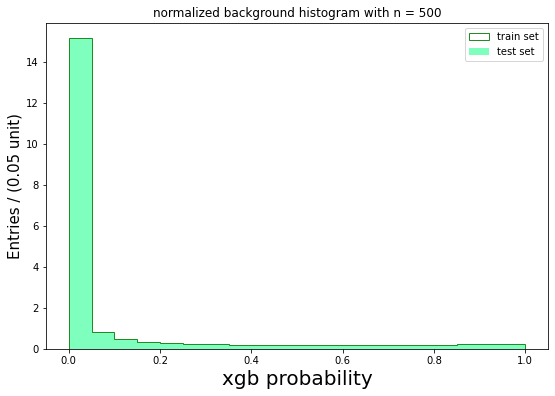

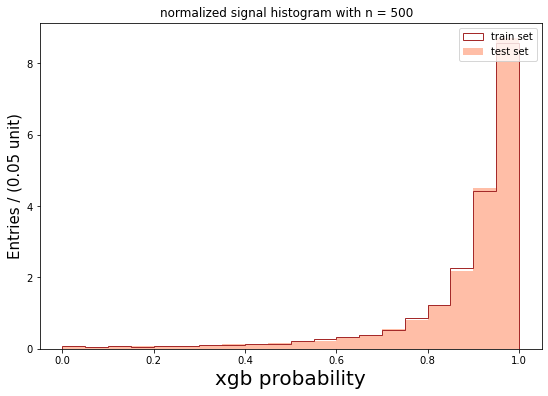

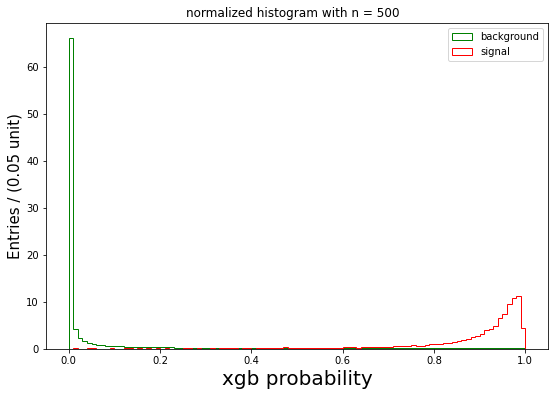

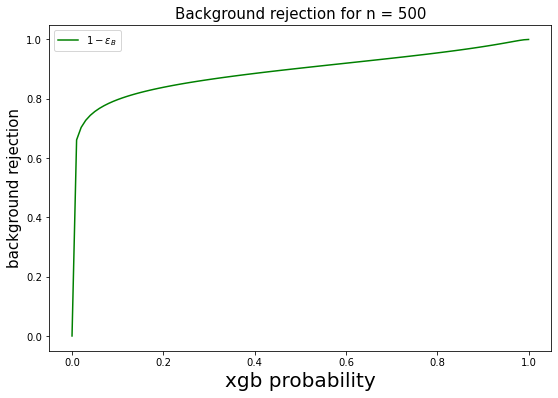

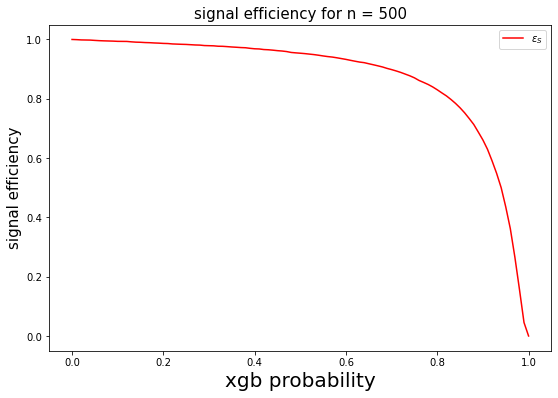

In [ ]:

estimator = 500

#Test for overtraining
#background
plt.figure(figsize=(9,6))
plt.hist(bh500_train,bins = binning, density=True, histtype="step", label = "train set", color = "forestgreen")
plt.hist(bh500,bins = binning, density=True, histtype="stepfilled", label = "test set", color = "springgreen", alpha = 0.5)
plt.title(f"normalized background histogram with n = {estimator}")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_500_overtrain_background.pdf", format="pdf",bbox_inches="tight")
plt.show() 

#signal
plt.figure(figsize=(9,6))
plt.hist(sh500_train,bins = binning, density=True, histtype="step", label = "train set", color = "brown")
plt.hist(sh500,bins = binning, density=True, histtype="stepfilled", label = "test set", color = "coral", alpha = 0.5)
plt.title(f"normalized signal histogram with n = {estimator}  ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_500_overtrain_signal.pdf", format="pdf",bbox_inches="tight")
plt.show()


#histogram
plt.figure(figsize=(9,6))
plt.hist(bh500,bins = bin_edges, density=True, histtype="step", label = "background", color = "g")
plt.hist(sh500,bins = bin_edges, density=True, histtype="step", label = "signal", color = "r")
plt.title(f"normalized histogram with n = {estimator}  ")
plt.ylabel("Entries / ({:.2f} unit)".format(binning[1]-binning[0]), fontsize = 15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
#plt.savefig("/work/aavocone/week5/large_500_histogram.pdf", format="pdf",bbox_inches ="tight")
plt.show()

#signal efficiency background rejection
plt.figure(figsize=(9,6))
plt.plot(bin_edges, b500, label = "$1-\epsilon_B$", color ="g")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection for n = {estimator}", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_{estimator}_background_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, s500, label = "$\epsilon_S$", color = "r")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("signal efficiency",fontsize=15)
plt.title(f"signal efficiency for n = {estimator}", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_{estimator}_signal_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()


## compare signal efficiency and background rejection

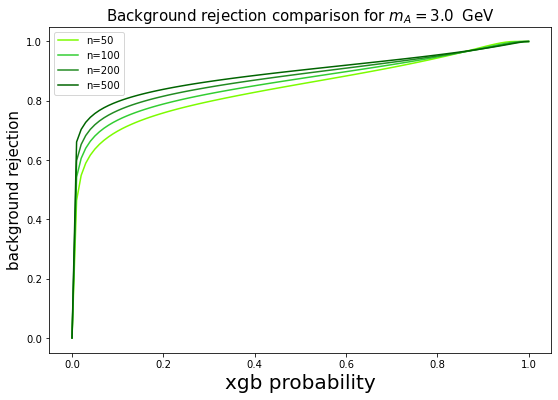

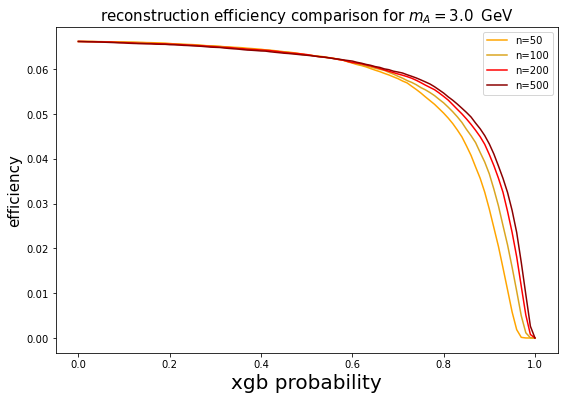

In [10]:

plt.figure(figsize=(9,6))
plt.plot(bin_edges, 1-b50, label = "n=50", color ="lawngreen")
plt.plot(bin_edges, 1-b100, label = "n=100", color ="limegreen")
plt.plot(bin_edges, 1-b200, label = "n=200", color ="forestgreen")
plt.plot(bin_edges, 1-b500, label = "n=500", color ="darkgreen")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("background rejection", fontsize = 15)
plt.title(f"Background rejection comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week9/large_all_background_rejection.pdf", format="pdf",bbox_inches="tight")
plt.show() 

plt.figure(figsize=(9,6))
plt.plot(bin_edges, s50, label = "n=50", color ="orange")
plt.plot(bin_edges, s100, label = "n=100", color ="goldenrod")
plt.plot(bin_edges, s200, label = "n=200", color ="red")
plt.plot(bin_edges, s500, label = "n=500", color ="darkred")
plt.xlabel("xgb probability", fontsize = 20)
plt.ylabel("efficiency",fontsize=15)
plt.title(f"reconstruction efficiency comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week9/large_all_signal_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()

## ROC curve

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

#n=50
auc50 =roc_auc_score(ytest,y50)
fp50,tp50, thresh50 = roc_curve(ytest, y50)
#n=100
auc100 = roc_auc_score(ytest,y100)
fp100,tp100, thresh100 = roc_curve(ytest, y100)
#n=200
auc200 =roc_auc_score(ytest,y200)
fp200,tp200, thresh200 = roc_curve(ytest, y200)
#n=500
auc500 =roc_auc_score(ytest,y500)
fp500,tp500, thresh500 = roc_curve(ytest, y500)



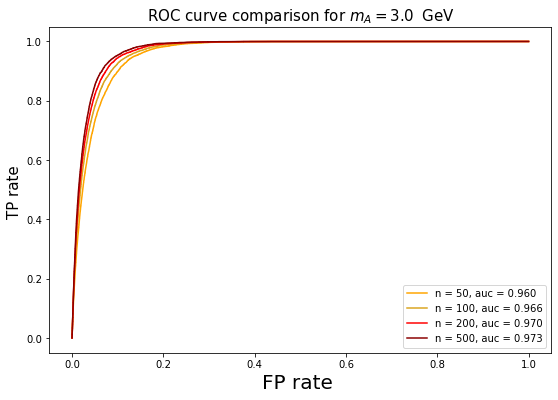

In [8]:
plt.figure(figsize=(9,6))
plt.plot(fp50, tp50, label = f"n = 50, auc = {auc50:.3f}", color ="orange")
plt.plot(fp100, tp100, label = f"n = 100, auc = {auc100:.3f}", color ="goldenrod")
plt.plot(fp200, tp200, label = f"n = 200, auc = {auc200:.3f}", color ="red")
plt.plot(fp500, tp500, label = f"n = 500, auc = {auc500:.3f}", color ="darkred")
plt.title(f"ROC curve comparison for $m_A = 3.0\:$ GeV", fontsize = 15)
plt.xlabel("FP rate ", fontsize = 20)
plt.ylabel("TP rate ", fontsize = 15)
plt.legend()
#plt.savefig(f"/work/aavocone/week5/large_ROC_comparison.pdf", format="pdf",bbox_inches="tight")
plt.show()


## PUNZI

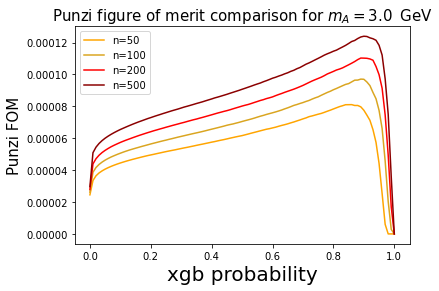

0.0001239942928215974


In [9]:
#ponzi
def PFOM(seff,beff,bhist,n):
    return seff/(np.sqrt(beff*sum(bhist))+n/2)

bin_edges = np.linspace(0,1,101)

plt.plot(bin_edges, PFOM(s50,b50,bh50,5), label = "n=50", color ="orange")
plt.plot(bin_edges, PFOM(s100,b100,bh100,5), label = "n=100", color ="goldenrod")
plt.plot(bin_edges, PFOM(s200,b200,bh200,5), label = "n=200", color ="red")
plt.plot(bin_edges, PFOM(s500,b500,bh500,5), label = "n=500", color ="darkred")
plt.title("Punzi figure of merit comparison for $m_A = 3.0\:$ GeV",fontsize=15)
plt.ylabel("Punzi FOM",fontsize=15)
plt.xlabel("xgb probability", fontsize = 20)
plt.legend()
plt.savefig(f"/work/aavocone/week9/large_PFOM3.pdf", format="pdf",bbox_inches="tight")
plt.show()
print(max(PFOM(s500,b500,bh500,5)))